In [ ]:

from sklearn.metrics import confusion_matrix
from tensorflow.keras.layers import BatchNormalization
from keras.layers import Conv2D, Lambda, MaxPooling2D
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
import nltk
import pandas as pd
import math
import os
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from keras.models import Sequential
import numpy as np
from imblearn.over_sampling import SMOTE
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, Flatten
from keras.utils import to_categorical


In [ ]:
X= pd.read_csv("Train_supervised.csv")
df_X_train = pd.DataFrame(X)

X= X.iloc[: , :-1]
X= X.iloc[: , :-1]
X = X.iloc[: , 1:]

print(X)

      punc   numbers    spaces  characters  stopwords  position  order  \
0      0.0  0.103448  0.189655    1.017544   0.250000  0.017544      1   
1      0.0  0.018519  0.222222    0.947368   0.307692  0.035088      2   
2      0.0  0.000000  0.220779    1.350877   0.555556  0.052632      3   
3      0.0  0.020408  0.285714    0.859649   0.400000  0.070175      4   
4      0.0  0.000000  0.216667    1.052632   0.428571  0.087719      5   
...    ...       ...       ...         ...        ...       ...    ...   
4783   0.0  0.000000  0.277778    0.197802   0.636364  0.978022    178   
4784   0.0  0.000000  0.277778    0.098901   0.333333  0.983516    179   
4785   0.0  0.000000  0.225806    0.170330   0.250000  0.989011    180   
4786   0.0  0.000000  0.242857    0.384615   0.500000  0.994505    181   
4787   0.0  0.000000  0.255319    0.258242   0.384615  1.000000    182   

          noun  preposition      verb  adjectives  wordratio  \
0     0.416667     0.166667  0.166667    0.0000

In [ ]:

ans = input("Enter number 1 for info-symatrical else for coorelation: ")
if(ans == '1'):
  X = X.drop('overlaping_words', axis=1)
  X = X.drop('adjectives', axis=1)
  X = X.drop('punc', axis=1)
  X = X.drop('verb', axis=1)
else:
  X = X.drop('overlaping_words', axis=1)
  X = X.drop('adjectives', axis=1)
  X = X.drop('position', axis=1)
  X = X.drop('verb', axis=1)
  qq=10


print(X)

Enter number 1 for info-symatrical else for coorelation: 2
      punc   numbers    spaces  characters  stopwords  order      noun  \
0      0.0  0.103448  0.189655    1.017544   0.250000      1  0.416667   
1      0.0  0.018519  0.222222    0.947368   0.307692      2  0.307692   
2      0.0  0.000000  0.220779    1.350877   0.555556      3  0.111111   
3      0.0  0.020408  0.285714    0.859649   0.400000      4  0.133333   
4      0.0  0.000000  0.216667    1.052632   0.428571      5  0.357143   
...    ...       ...       ...         ...        ...    ...       ...   
4783   0.0  0.000000  0.277778    0.197802   0.636364    178  0.000000   
4784   0.0  0.000000  0.277778    0.098901   0.333333    179  0.000000   
4785   0.0  0.000000  0.225806    0.170330   0.250000    180  0.000000   
4786   0.0  0.000000  0.242857    0.384615   0.500000    181  0.000000   
4787   0.0  0.000000  0.255319    0.258242   0.384615    182  0.153846   

      preposition  wordratio  unique_words  title_wo

In [ ]:

Y = pd.read_csv("Train_supervised.csv")

Y= Y.iloc[: , :-1]
Y= Y.iloc[: , -1:]
print(Y)

      selection
0             1
1             0
2             0
3             1
4             1
...         ...
4783          0
4784          0
4785          0
4786          0
4787          1

[4788 rows x 1 columns]


In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 1)
X, Y = sm.fit_resample(X, Y)


In [ ]:
from keras.utils import to_categorical # convert to one-hot-encoding
Y_trainn = to_categorical(Y, num_classes = 2)
##Y_vall = to_categorical(Y_val, num_classes = 2)

In [ ]:
import itertools
from keras.layers import LeakyReLU
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential, Model
from tensorflow.keras.optimizers import RMSprop,Adam,Nadam
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool1D,Conv1D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import tensorflow as tf
keras = tf.keras
from tensorflow.keras import initializers
from tensorflow.keras import layers

initializer = tf.keras.initializers.RandomUniform(minval=0., maxval=1.)

model = Sequential()

model.add(Conv1D(filters = 3, kernel_size =7,kernel_initializer=initializer, padding = 'Same',activation="relu",
                 input_shape = (11,1)))


model.add(MaxPool1D(pool_size=2))
model.add(Dropout(0.25))
#
model.add(Conv1D(filters = 1, kernel_size =5,kernel_initializer=initializer,padding = 'Same',activation="relu"))


model.add(MaxPool1D(pool_size=2, strides=2))

model.add(layers.GRU(64))

model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(8, activation="relu"))

model.add(Dropout(0.1))
model.add(Dense(2, activation = "sigmoid"))

#model.add(layers.Dense(10))
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 11, 3)             24        
                                                                 
 max_pooling1d_8 (MaxPoolin  (None, 5, 3)              0         
 g1D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 5, 3)              0         
                                                                 
 conv1d_9 (Conv1D)           (None, 5, 1)              16        
                                                                 
 max_pooling1d_9 (MaxPoolin  (None, 2, 1)              0         
 g1D)                                                            
                                                                 
 gru_4 (GRU)                 (None, 64)               

In [ ]:
optimizer = Adam(lr=0.01, beta_1=0.9, beta_2=0.999)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
history = model.fit(X,Y_trainn,epochs = 15,batch_size=32)

Epoch 1/15
220/220 [==============================] - 5s 8ms/step - loss: 0.7135 - accuracy: 0.5122
Epoch 2/15
220/220 [==============================] - 1s 5ms/step - loss: 0.6923 - accuracy: 0.5046
Epoch 3/15
220/220 [==============================] - 1s 5ms/step - loss: 0.6914 - accuracy: 0.5226
Epoch 4/15
220/220 [==============================] - 1s 4ms/step - loss: 0.6902 - accuracy: 0.5289
Epoch 5/15
220/220 [==============================] - 1s 5ms/step - loss: 0.6889 - accuracy: 0.5354
Epoch 6/15
220/220 [==============================] - 1s 4ms/step - loss: 0.6880 - accuracy: 0.5400
Epoch 7/15
220/220 [==============================] - 1s 5ms/step - loss: 0.6870 - accuracy: 0.5359
Epoch 8/15
220/220 [==============================] - 1s 4ms/step - loss: 0.6876 - accuracy: 0.5376
Epoch 9/15
220/220 [==============================] - 1s 4ms/step - loss: 0.6862 - accuracy: 0.5440
Epoch 10/15
220/220 [==============================] - 1s 5ms/step - loss: 0.6858 - accuracy: 0.5431

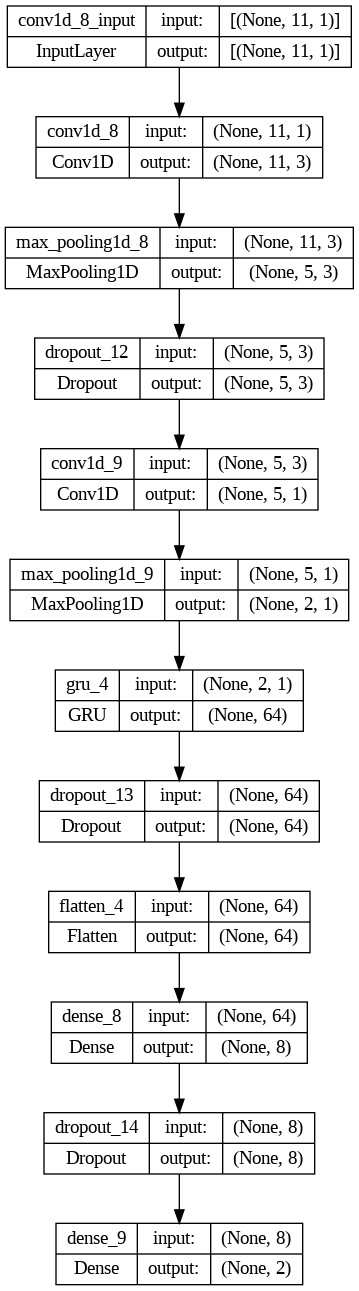

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
X_test = pd.read_csv("Test_supervised.csv")
df_X_test = pd.DataFrame(X_test)  #whole dataframe of test


X_test= X_test.iloc[: , :-1]
X_test= X_test.iloc[: , :-1]
X_test = X_test.iloc[: , 1:]

if(ans == '1'):
  X_test = X_test.drop('overlaping_words', axis=1)
  X_test = X_test.drop('adjectives', axis=1)
  X_test = X_test.drop('punc', axis=1)
  X_test = X_test.drop('verb', axis=1)
else:
  X_test = X_test.drop('overlaping_words', axis=1)
  X_test = X_test.drop('adjectives', axis=1)
  X_test = X_test.drop('position', axis=1)
  X_test = X_test.drop('verb', axis=1)
  qq=10


print(X_test.head())
print(X_test.shape)

       punc  numbers    spaces  characters  stopwords  order      noun  \
0  0.000000      0.0  0.236364    0.433071   0.500000      1  0.000000   
1  0.008065      0.0  0.241935    0.976378   0.516129      2  0.032258   
2  0.006536      0.0  0.254902    1.204724   0.675000      3  0.025000   
3  0.008333      0.0  0.233333    0.944882   0.517241      4  0.000000   
4  0.000000      0.0  0.246377    0.543307   0.555556      5  0.055556   

   preposition  wordratio  unique_words  title_words  
0     0.357143   0.004997     -0.852146     0.142857  
1     0.419355   0.011267     -0.859701     0.000000  
2     0.450000   0.013902     -0.886098     0.000000  
3     0.379310   0.010903     -0.920131     0.000000  
4     0.444444   0.006269     -0.882620     0.000000  
(2965, 11)


In [ ]:

Y_test = pd.read_csv("Test_supervised.csv")

Y_test = Y_test.iloc[: , :-1]
Y_test= Y_test.iloc[: , -1:]
print(Y_test.head())
print(Y_test.shape)

   selection
0          1
1          0
2          0
3          1
4          0
(2965, 1)


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

Y_testt = to_categorical(Y_test, num_classes = 2)

93/93 [==============================] - 1s 2ms/step
[[1933  441]
 [ 441  150]]
with following features
accuracy is : 
0.7025295109612142
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      2374
           1       0.25      0.25      0.25       591

    accuracy                           0.70      2965
   macro avg       0.53      0.53      0.53      2965
weighted avg       0.70      0.70      0.70      2965



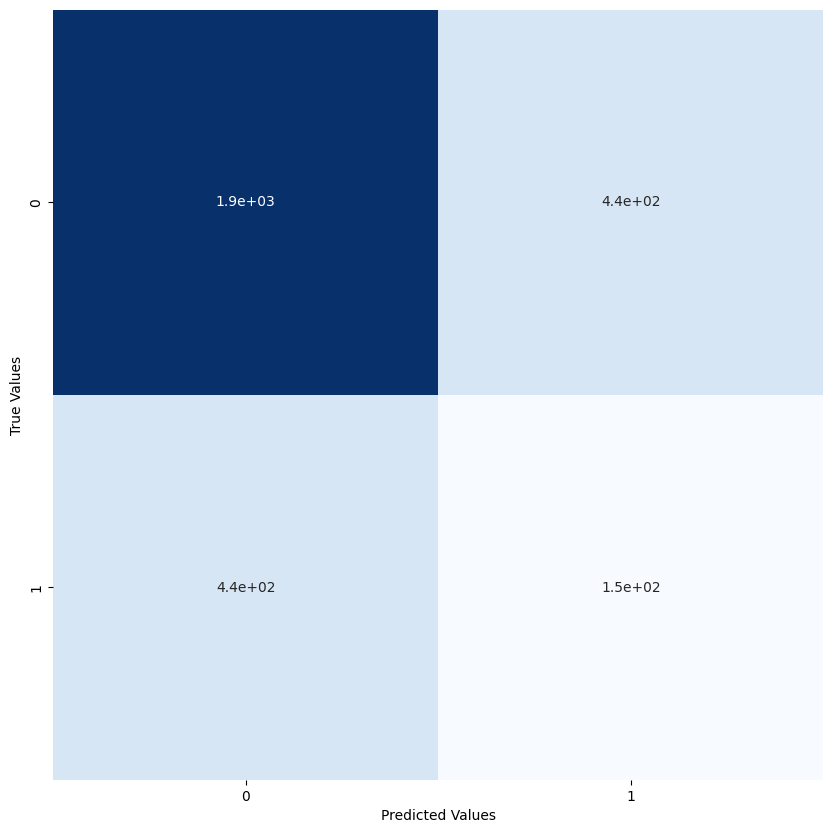

In [ ]:

fig = plt.figure(figsize=(10, 10))

yy_pred = model.predict(X_test)

YY_pred = np.argmax(yy_pred, 1)
Y_valc = np.argmax(Y_testt, 1)

mt = confusion_matrix(Y_valc, YY_pred)
print(mt)
accc = accuracy_score(Y_valc, YY_pred)
print("accuracy is : ")
print(accc)

print(classification_report(Y_valc, YY_pred))

sns.heatmap(mt.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues)
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();



In [ ]:
df_X_test['predicted'] = YY_pred
print(df_X_test)

                                               sentence      punc  numbers  \
0     اگلے وقتوں کی بات ہے کسی گاؤں میں ایک چغل خور ...  0.000000      0.0   
1      دوسروں کی چغلی کھانا اور ایک کی بات دوسرے سے ...  0.008065      0.0   
2      اس نے بارہا اس بات کا ارادہ کیا کہ اب کسی سے ...  0.006536      0.0   
3      دراصل وہ اپنی عادت سے مجبور تھا اور اسی عادت ...  0.008333      0.0   
4      اس نے دوسری ملازمت کی بہتیری کوشش کی مگر وہ ا...  0.000000      0.0   
...                                                 ...       ...      ...   
2960                         مرحوم کو سپرد خاک کیا گیا   0.000000      0.0   
2961   مولانا ابوبکر صاحب نے قبر کے سرھانے کھڑے ہو ک...  0.009346      0.0   
2962   اگر تم میں سے کسی کو کوئی تکلیف پہنچی ہو تو م...  0.000000      0.0   
2963   گر یہ سب کے گلوگیر ہوا ، کسی نے روکا اور کسی ...  0.010000      0.0   
2964        اس آواز کو سنا کسی نے نہیں محسوس سب نے کیا   0.000000      0.0   

        spaces  characters  stopwords  position  order      nou

In [ ]:
count_out = 63
predicted_summaries = []
while (count_out <=89):
    count = 0
    count_in = 0
    str_text = ''
    while (count_in <=2964):
        if(df_X_test['document_number'][count_in] == count_out and df_X_test['predicted'][count_in] == 1):
          str_text = str_text + ' ' + df_X_test['sentence'][count_in]
          print(count_out)
          count = count + 1
        count_in = count_in + 1
    print(count)
    print(str_text)
    predicted_summaries.append(str_text)
    count_out = count_out + 1


63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
22
 اگلے وقتوں کی بات ہے کسی گاؤں میں ایک چغل خور رہتا تھا   دوسروں کی چغلی کھانا اور ایک کی بات دوسرے سے کرنا اس کی عادت تھی اور لاکھ کوشش کے باوجود ، وہ اپنی عادت کو نہ چھوڑ سکا تھا   اس نے بارہا اس بات کا ارادہ کیا کہ اب کسی سے کسی کی چغلی نہیں کھائے گا ، ایک کی بات دوسرے سے نہیں کہے گا لیکن ہر بار وہ اپنے اس ارادے میں ناکام ہو جاتا   دراصل وہ اپنی عادت سے مجبور تھا اور اسی عادت کی وجہ سے اسے اپنی ملازمت سے بھی ہاتھ دھونا پڑے تھے ، چنانچہ وہ بےکار تھا   اس نے دوسری ملازمت کی بہتیری کوشش کی مگر وہ اس میں کامیاب نہ ہو سکا   کچھ دن تک تو وہ اپنی جمع پونجی پر گزربسر کرتا رہا لیکن جب تھوڑا تھوڑا کر کے اس کا سارا سرمایہ ختم ہو گیا تو بہت پریشان ہوا   اس نے نوکری اور مزدوری کے لیے سرتوڑ کوشش شروع کر دی کہ کہیں فاقوں کی نوبت نہ آ جائے   مختلف لوگوں سے کہا ، در در کی خاک چھانی ، ایک ایک کے پاس گیا مگر مصیبت یہ تھی کہ چغل خور ہونے کی وجہ سے اسے کوئی بھی اپنے پاس ملازم رکھنے پر تیار نہ ہوتا تھا   گاؤں کے تمام لوگ اس سے اچھی طرح 

In [ ]:
print(predicted_summaries)

[' اگلے وقتوں کی بات ہے کسی گاؤں میں ایک چغل خور رہتا تھا   دوسروں کی چغلی کھانا اور ایک کی بات دوسرے سے کرنا اس کی عادت تھی اور لاکھ کوشش کے باوجود ، وہ اپنی عادت کو نہ چھوڑ سکا تھا   اس نے بارہا اس بات کا ارادہ کیا کہ اب کسی سے کسی کی چغلی نہیں کھائے گا ، ایک کی بات دوسرے سے نہیں کہے گا لیکن ہر بار وہ اپنے اس ارادے میں ناکام ہو جاتا   دراصل وہ اپنی عادت سے مجبور تھا اور اسی عادت کی وجہ سے اسے اپنی ملازمت سے بھی ہاتھ دھونا پڑے تھے ، چنانچہ وہ بےکار تھا   اس نے دوسری ملازمت کی بہتیری کوشش کی مگر وہ اس میں کامیاب نہ ہو سکا   کچھ دن تک تو وہ اپنی جمع پونجی پر گزربسر کرتا رہا لیکن جب تھوڑا تھوڑا کر کے اس کا سارا سرمایہ ختم ہو گیا تو بہت پریشان ہوا   اس نے نوکری اور مزدوری کے لیے سرتوڑ کوشش شروع کر دی کہ کہیں فاقوں کی نوبت نہ آ جائے   مختلف لوگوں سے کہا ، در در کی خاک چھانی ، ایک ایک کے پاس گیا مگر مصیبت یہ تھی کہ چغل خور ہونے کی وجہ سے اسے کوئی بھی اپنے پاس ملازم رکھنے پر تیار نہ ہوتا تھا   گاؤں کے تمام لوگ اس سے اچھی طرح واقف تھے اور اس کی چغلی کھانے کی عادت کے بارے میں جانتے تھے ، اس لی

In [ ]:
count_out = 63
actual_summaries = []
while (count_out <=89):
    count = 0
    count_in = 0
    str_text = ''
    while (count_in <=2964):
        if(df_X_test['document_number'][count_in] == count_out and df_X_test['selection'][count_in] == 1):
          str_text = str_text + ' ' + df_X_test['sentence'][count_in]
          print(count_out)
          count = count + 1
        count_in = count_in + 1
    print(count)
    print(str_text)
    actual_summaries.append(str_text)
    count_out = count_out + 1

63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
28
 اگلے وقتوں کی بات ہے کسی گاؤں میں ایک چغل خور رہتا تھا   دراصل وہ اپنی عادت سے مجبور تھا اور اسی عادت کی وجہ سے اسے اپنی ملازمت سے بھی ہاتھ دھونا پڑے تھے ، چنانچہ وہ بےکار تھا   آخر جب وہ مسلسل ناکامیوں سے تنگ آ گیا اور نوبت واقعی فاقوں تک آ پہنچی تو اس نے دل میں سوچا اس گاؤں کو چھوڑ دینا چاہیے اور کہیں اور چل کر قسمت آزمائی کرنی چاہیے   چنانچہ اس نے تھوڑا بہت ضروری سامان لیا اور گاؤں چھوڑ کر سفر پر روانہ ہو گیا تاکہ کسی دوسرے گاؤں یا شہر میں جا کر محنت مزدوری کرے   چلتے چلاتے وہ ایک اور گاؤں میں جا پہنچا   اس لیے اسے امید تھی کہ یہاں نوکری مل جائے گی ، لہذا وہ ایک کسان کے پاس گیا اور اس سے کہا مجھے آپ اپنی ملازمت میں رکھ لیں   چنانچہ چغل خور کسان کے پاس ملازم ہو گیا   ایک روز کسان حسب معمول اپنے کھیتوں میں گیا ہوا تھا اور گھر میں اس کی بیوی اکیلی تھی   یہ دیکھ کر چغل خور کسان کی بیوی کے پاس گیا اور بڑا ہمدرد بنتے ہوئے کہنے لگا: اگر تم بُرا نہ مانو تو میں تم سے ایک بات کہوں   کسان کی بیوی بولی : ضرو

In [ ]:

def ROUGE2_pre(g, h):

    ac_words1 = g.split(' ')
    pro_words1 = h.split(' ')


    ac_words = list(nltk.bigrams(ac_words1))
    pro_words = list(nltk.bigrams(pro_words1))


    count = 0
    if len(ac_words) > len(pro_words):
        for x in pro_words:
            for k in ac_words:
               if x == k:
                    count= count + 1
                    break
    elif len(pro_words)>len(ac_words):
        for x in ac_words:
            for k in pro_words:
                if x == k:
                    count = count + 1
                    break

    pre_rouge_2 = count / len(pro_words)

    return pre_rouge_2



def ROUGE2_recall(g, h):
    # Initialising the variables which will store words and the number of the words.


    ac_words1 = g.split(' ')
    pro_words1 = h.split(' ')


    ac_words = list(nltk.bigrams(ac_words1))
    pro_words = list(nltk.bigrams(pro_words1))

    count = 0
    if len(ac_words) > len(pro_words):
        for x in pro_words:
            for k in ac_words:
                if x == k:
                    count = count + 1
                    break
    elif len(pro_words) > len(ac_words):
        for x in ac_words:
            for k in pro_words:
                if x == k:
                    count = count + 1
                    break

    # Storing the final accuracy of Rouge-1
    if(len(ac_words)==0):
      re_rouge_2 = count / 1
    else:
      re_rouge_2 = count / len(ac_words)

    return re_rouge_2




def ROUGE1_pre(g, h):

    ac_words = g.split(' ')
    pro_words = h.split(' ')


    count = 0
    if len(ac_words) > len(pro_words):
        for x in pro_words:
            for k in ac_words:
               if x == k:
                    count= count + 1
                    break
    elif len(pro_words)>len(ac_words):
        for x in ac_words:
            for k in pro_words:
                if x == k:
                    count = count + 1
                    break


    pre_rouge_1 = count / len(pro_words)

    return pre_rouge_1


def ROUGE1_re(g, h):

    ac_words = g.split(' ')
    pro_words = h.split(' ')

    count = 0
    if len(ac_words) > len(pro_words):
        for x in pro_words:
            for k in ac_words:
                if x == k:
                    count = count + 1
                    break
    elif len(pro_words) > len(ac_words):
        for x in ac_words:
            for k in pro_words:
                if x == k:
                    count = count + 1
                    break

    if(len(ac_words)==0):
      re_rouge_1 = count / 1
    else:
      re_rouge_1 = count / len(ac_words)

    return re_rouge_1


In [ ]:

j = 0
precount = 1
presumscore = 0
preavg = 0

resumscore = 0
reavg = 0

f_score = 0
f_sums = 0
f_avg = 0

presumscore2 = 0
preavg2 = 0

resumscore2 = 0
reavg2 = 0

f_score2 = 0
f_sums2 = 0
f_avg2 = 0

prelist = []

for x in predicted_summaries:
    precision = ROUGE1_pre(predicted_summaries[j], actual_summaries[j])
    recall = ROUGE1_re(predicted_summaries[j], actual_summaries[j])

    presumscore = presumscore + precision
    resumscore = resumscore + recall



    preavg = presumscore / precount
    reavg  = resumscore / precount




    # ==========ROUGE-2==========================================

    precision2 = ROUGE2_pre(predicted_summaries[j], actual_summaries[j])
    recall2 = ROUGE2_recall(predicted_summaries[j], actual_summaries[j])
    # print(XC)

    presumscore2 = presumscore2 + precision2
    resumscore2 = resumscore2 + recall2

    preavg2 = presumscore2 / precount
    reavg2  = resumscore2 / precount

    precount = precount + 1
    j = j+1




f_score = 2 * (preavg * reavg) / (preavg + reavg)

f_score2 = 2 * (preavg2 * reavg2) / (preavg2 + reavg2)




print("average recall is: ")
print(reavg)

print("average Precision is: ")
print(preavg)

print("f-measure average: ")
print(f_score)

print("for ROUGE 2")

print("ROUGE-2 average Precision is: ")
print(preavg2)


print("AROUGE-2 average recall is: ")
print(reavg2)

print("ROUGE-2 f-measure average: ")
print(f_score2)


average recall is: 
0.6352255170890873
average Precision is: 
0.6644031482529014
f-measure average: 
0.6494868028992085
for ROUGE 2
ROUGE-2 average Precision is: 
0.4047517578180881
AROUGE-2 average recall is: 
0.3729062519152276
ROUGE-2 f-measure average: 
0.3881769597301608
